## Read CSVs

In [4]:
import pandas as pd

In [5]:
t_file = pd.read_csv("t_file.csv")
t_people = pd.read_csv("t_people.csv")
t_change = pd.read_csv("t_change.csv")
t_history = pd.read_csv("t_history.csv")
t_revision = pd.read_csv("t_revision.csv")

In [6]:
print("shape of t_file : {}".format(t_file.shape))
print("shape of t_people : {}".format(t_people.shape))
print("shape of t_change : {}".format(t_change.shape))
print("shape of t_history : {}".format(t_history.shape))
print("shape of t_revision : {}".format(t_revision.shape))

shape of t_file : (1490072, 5)
shape of t_people : (2534, 5)
shape of t_change : (57376, 12)
shape of t_history : (435814, 7)
shape of t_revision : (106957, 15)


## Dtypes setup

In [12]:
print('t_file DTYPES\n' , t_file.dtypes, '\n')
print('t_people DTYPES\n' , t_people.dtypes, '\n')
print('t_change DTYPES\n' , t_change.dtypes, '\n')
print('t_history DTYPES\n' , t_history.dtypes, '\n')
print('t_revision DTYPES\n' , t_revision.dtypes, '\n')

t_file DTYPES
 id                  int64
f_fileName         object
f_linesInserted     int64
f_linesDeleted      int64
f_revisionId        int64
dtype: object 

t_people DTYPES
 id              int64
p_accountId     int64
p_name         object
p_email        object
p_userName     object
dtype: object 

t_change DTYPES
 id                      int64
ch_id                  object
ch_changeId            object
ch_changeIdNum          int64
ch_project             object
ch_branch              object
ch_topic               object
ch_authorAccountId      int64
ch_createdTime         object
ch_updatedTime         object
ch_status              object
ch_mergeable          float64
dtype: object 

t_history DTYPES
 id                        int64
hist_id                  object
hist_message             object
hist_authorAccountId    float64
hist_createdTime         object
hist_patchSetNum          int64
hist_changeId             int64
dtype: object 

t_revision DTYPES
 id                        

In [13]:
print('t_file Columns\n' , t_file.columns.values, '\n')
print('t_people Columns\n' , t_people.columns.values, '\n')
print('t_change Columns\n' , t_change.columns.values, '\n')
print('t_history Columns\n' , t_history.columns.values, '\n')
print('t_revision Columns\n' , t_revision.columns.values, '\n')

t_file Columns
 ['id' 'f_fileName' 'f_linesInserted' 'f_linesDeleted' 'f_revisionId'] 

t_people Columns
 ['id' 'p_accountId' 'p_name' 'p_email' 'p_userName'] 

t_change Columns
 ['id' 'ch_id' 'ch_changeId' 'ch_changeIdNum' 'ch_project' 'ch_branch'
 'ch_topic' 'ch_authorAccountId' 'ch_createdTime' 'ch_updatedTime'
 'ch_status' 'ch_mergeable'] 

t_history Columns
 ['id' 'hist_id' 'hist_message' 'hist_authorAccountId' 'hist_createdTime'
 'hist_patchSetNum' 'hist_changeId'] 

t_revision Columns
 ['id' 'rev_id' 'rev_subject' 'rev_message' 'rev_authorUsername'
 'rev_createdTime' 'rev_committerUsername' 'rev_committedTime' 'rev_ref'
 'rev_git' 'rev_repo' 'rev_http' 'rev_ssh' 'rev_patchSetNum'
 'rev_changeId'] 



In [47]:
t_change.ch_createdTime = pd.to_datetime(t_change.ch_createdTime)
t_change.ch_updatedTime = pd.to_datetime(t_change.ch_updatedTime)

## Import CSV into local in-memory sqlite server

In [14]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
engine.connect

<bound method Engine.connect of Engine(sqlite://)>

In [15]:
t_file.to_sql("t_file", con= engine, if_exists='replace', index=False)
t_people.to_sql("t_people", con= engine, if_exists='replace', index=False)
t_change.to_sql("t_change", con= engine, if_exists='replace', index=False)
t_history.to_sql("t_history", con= engine, if_exists='replace', index=False)
t_revision.to_sql("t_revision", con= engine, if_exists='replace', index=False)

#### tables in the database

In [50]:
engine.table_names()

<ipython-input-50-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['t_change', 't_file', 't_history', 't_people', 't_revision']

#### Schema

In [51]:
from IPython.display import Image
Image(url='https://image.slidesharecdn.com/msr16yang-160515235151/95/msr-2016-data-showcase-mining-code-review-repositories-11-638.jpg?cb=1463356751') 

#### Query syntax

In [52]:
pd.read_sql(
"""
SELECT * FROM t_revision 
;
""", con= engine).head(2)

,id,rev_id,rev_subject,rev_message,rev_authorUsername,rev_createdTime,rev_committerUsername,rev_committedTime,rev_ref,rev_git,rev_repo,rev_http,rev_ssh,rev_patchSetNum,rev_changeId
0,1,663dd192a19e7ab1452668a3672fb467c8110e04,Add IP subnet utility method for converting lists,Add IP subnet utility method for converting li...,Alex Bikfalvi,2016-11-17 15:18:15,Alex Bikfalvi,2016-11-17 21:59:31,refs/changes/81/302681/1,None,None,https://review.gerrithub.io/midonet/midonet,None,1,1
1,2,fc9090c70665a19c44037113d5e3631e2c238aa8,Make FlowRecorder send records over TCP to Clio.,Make FlowRecorder send records over TCP to Cli...,Alexandre Fonseca,2016-11-18 11:18:02,Alexandre Fonseca,2016-11-18 11:19:30,refs/changes/12/302712/1,None,None,https://review.gerrithub.io/midonet/midonet,None,1,2


In [64]:
pd.read_sql(
"""
Select * from (SELECT hist_message , count(hist_message) as count_message
FROM t_history 
group by 1
ORDER BY 2 DESC) t 
WHERE count_message > 500
;

"""
            , con = engine)

# from the table, it is clear that the hist_message consists of these keywords:
    # successfully merged
    # Abandoned
    # patch set 

,hist_message,count_message
0,Uploaded patch set 1.,46000
1,Patch Set 1: Code-Review+2 Verified+1,13492
2,Uploaded patch set 2.,9141
3,Abandoned,8485
4,Patch Set 1: Code-Review+2,7159
5,Uploaded patch set 3.,5354
6,Change has been successfully pushed.,4365
7,Patch Set 1: Code-Review+1,4056
8,Uploaded patch set 4.,3404
9,Patch Set 2: Code-Review+2,2798


In [54]:
pd.read_sql("""SELECT COUNT(*), ch_status FROM t_change GROUP BY ch_status;

""", con = engine)

,COUNT(*),ch_status
0,10592,ABANDONED
1,38595,MERGED
2,8189,NEW


In [55]:
t_change.head()

,id,ch_id,ch_changeId,ch_changeIdNum,ch_project,ch_branch,ch_topic,ch_authorAccountId,ch_createdTime,ch_updatedTime,ch_status,ch_mergeable
0,1,midonet%2Fmidonet~master~I4dc396405db5bb224e40...,I4dc396405db5bb224e40581fc7ad68e7dd6bcd55,302681,midonet/midonet,master,m/fip6/neutron,1002751,2016-11-18 08:36:25,2016-11-18 11:23:32,NEW,1.0
1,2,midonet%2Fmidonet~master~I9d8147cc0cce4731e461...,I9d8147cc0cce4731e4611b11706864f6a347d34e,302712,midonet/midonet,master,ME-1213,1009034,2016-11-18 11:20:01,2016-11-18 11:20:11,NEW,1.0
2,3,Mirantis%2Fstepler~master~Icd3d1aba474b89b73c9...,Icd3d1aba474b89b73c9f999c0ab539b88039d2df,302707,Mirantis/stepler,master,neutron_sighup,1008737,2016-11-18 10:53:30,2016-11-18 11:19:14,NEW,1.0
3,4,midonet%2Fmidonet~master~I5476bcd56af426f13daf...,I5476bcd56af426f13dafc27da469542173598f6e,302678,midonet/midonet,master,lb_api_endpoint,1003629,2016-11-18 08:15:36,2016-11-18 11:07:58,NEW,1.0
4,5,midonet%2Fmidonet~master~I2e50d313d886dc8b4e80...,I2e50d313d886dc8b4e8082e0f213f2222f9e3b33,302689,midonet/midonet,master,recorder-thread-safety,1009034,2016-11-18 09:25:35,2016-11-18 11:07:11,NEW,1.0


In [191]:
pd.read_sql("""

SELECT * FROM t_change order by ch_project, ch_updatedTime ;

""", con = engine).head(5)

,id,ch_id,ch_changeId,ch_changeIdNum,ch_project,ch_branch,ch_topic,ch_authorAccountId,ch_createdTime,ch_updatedTime,ch_status,ch_mergeable
0,47192,007-surajit%2FDirectory-List-PhoneGap-Plugin~m...,I2f8941f8d7db7afee59d5064657fc5af102ad0af,290380,007-surajit/Directory-List-PhoneGap-Plugin,master,None,1008636,2016-09-06 22:55:09.000000,2016-09-09 06:55:23.000000,ABANDONED,1.0
1,37755,091387-ea975-lab3%2Fea975-lab3~master~I386485d...,I386485d1ee5a77b7d08df54d697e5fcf452f92eb,229530,091387-ea975-lab3/ea975-lab3,master,None,1004294,2015-04-06 19:14:57.000000,2015-04-06 19:33:41.000000,MERGED,NaN
2,2033,184389%2FZPI_2~master~I7e63daf0fd518e5e3a7d7b4...,I7e63daf0fd518e5e3a7d7b40817d6074be45c317,260914,184389/ZPI_2,master,None,1007243,2016-01-23 23:59:22.000000,2016-01-24 00:02:58.000000,NEW,1.0
3,25313,184389%2FZPI_2~master~Ic76cf63175ce454a390aa79...,Ic76cf63175ce454a390aa794bda73b7418257f6e,260915,184389/ZPI_2,master,None,1007243,2016-01-24 00:09:36.000000,2016-01-24 00:14:35.000000,MERGED,NaN
4,2032,184389%2FZPI_2~master~I792b3720c17c898ad84f910...,I792b3720c17c898ad84f9100bebf4523dc8cbcc7,260918,184389/ZPI_2,master,None,1007243,2016-01-24 00:36:31.000000,2016-01-24 00:39:09.000000,NEW,1.0


In [62]:
pd.read_sql("""

SELECT (julianday(ch_updatedTime) - julianday(ch_createdTime)) * 24 FROM t_change;

""", con = engine).head(5)

,(julianday(ch_updatedTime) - julianday(ch_createdTime)) * 24
0,2.785278
1,0.002778
2,0.428889
3,2.872778
4,1.693333


In [63]:
t_change.ch_updatedTime - t_change.ch_createdTime

0       0 days 02:47:07
1       0 days 00:00:10
2       0 days 00:25:44
3       0 days 02:52:22
4       0 days 01:41:36
              ...      
57371   0 days 00:00:37
57372   0 days 00:01:38
57373   0 days 00:00:22
57374   0 days 00:02:56
57375   0 days 00:12:46
Length: 57376, dtype: timedelta64[ns]

## What percentage of code reviews gets merged?

In [152]:
pd.read_sql("""
SELECT 
ch_project,
count(ch_changeId) as total_changes, 
sum(case when ch_status = 'MERGED' then 1 else 0 end) as Total_Merged
from t_change 
group by 1
order by 2 desc;

""", con = engine)

,ch_project,total_changes,Total_Merged
0,midonet/midonet,4340,3883
1,redhat-openstack/khaleesi,2915,2292
2,Distrotech/linux,1758,1376
3,riscv/riscv-go,1405,182
4,redhat-openstack/tempest,1367,141
...,...,...,...
2497,1ambda/aram,1,0
2498,184389CR/ZPI_1,1,0
2499,184389/ZPI_3,1,0
2500,091387-ea975-lab3/ea975-lab3,1,1


In [211]:
merged_ = pd.read_sql("""
SELECT 
ch_project,
count(*) as total_changes, 
sum(case when ch_status = 'MERGED' then 1 else 0 end) as Total_Merged,
sum(case when ch_status = 'ABANDONED' then 1 else 0 end) as Total_abandoned
from (SELECT distinct 
ch_project
, ch_branch
, ch_topic
, ch_authorAccountId
, ch_createdTime
, ch_updatedTime
, ch_status

FROM t_change) 
group by 1;

""", con = engine)

In [212]:
merged_['pct_merged'] = merged_['Total_Merged'] / merged_['total_changes'] * 100
merged_['pct_abandoned'] = merged_['Total_abandoned'] / merged_['total_changes'] * 100

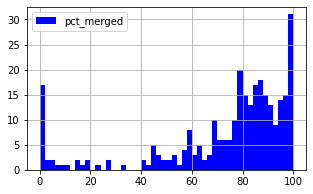

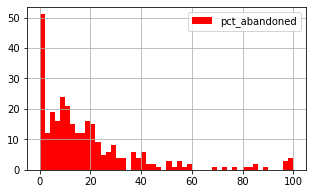

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_[merged_['total_changes'] > 20].pct_merged.hist(bins = 50
                                                       , color = 'b'
                                                       , figsize = (5,3)
                                                       , legend = True)
plt.show()

merged_[merged_['total_changes'] > 20].pct_abandoned.hist(bins = 50
                                                          , color = 'r'
                                                          , figsize = (5,3)
                                                          , legend = True)
plt.show()

In [264]:
print("percent merged " + str(round(merged_[merged_['total_changes'] > 20].pct_merged.mean(), 2)) + "%")
print("percent abandoned " + str(round(merged_[merged_['total_changes'] > 20].pct_abandoned.mean(), 2)) + "%")

percent merged 73.05%
percent abandoned 18.94%


In [204]:
# example project = midonet/midonet

pd.read_sql("""
SELECT distinct 
ch_project
, ch_branch
, ch_topic
, ch_authorAccountId
, ch_createdTime
, ch_updatedTime
, ch_status

FROM t_change 
WHERE ch_project = 'midonet/midonet'
ORDER BY ch_updatedTime
;

""", con = engine)

,ch_project,ch_branch,ch_topic,ch_authorAccountId,ch_createdTime,ch_updatedTime,ch_status
0,midonet/midonet,master,m/cleanups,1002763,2014-11-03 11:47:45.000000,2014-11-03 11:58:08.000000,MERGED
1,midonet/midonet,master,m/cleanups,1002763,2014-11-03 13:11:45.000000,2014-11-03 13:21:31.000000,MERGED
2,midonet/midonet,master,perf,1002754,2014-11-03 12:13:59.000000,2014-11-03 13:22:16.000000,MERGED
3,midonet/midonet,master,m/fdleak,1002763,2014-11-03 16:13:04.000000,2014-11-03 16:15:55.000000,MERGED
4,midonet/midonet,master,m/fdleak,1002763,2014-11-03 17:58:23.000000,2014-11-03 19:15:11.000000,MERGED
...,...,...,...,...,...,...,...
4269,midonet/midonet,master,lbaas_api_models,1003629,2016-11-14 07:04:32.000000,2016-11-18 09:01:06.000000,NEW
4270,midonet/midonet,master,recorder-thread-safety,1009034,2016-11-18 09:25:35.000000,2016-11-18 11:07:11.000000,NEW
4271,midonet/midonet,master,lb_api_endpoint,1003629,2016-11-18 08:15:36.000000,2016-11-18 11:07:58.000000,NEW
4272,midonet/midonet,master,ME-1213,1009034,2016-11-18 11:20:01.000000,2016-11-18 11:20:11.000000,NEW
